# compare teh twp csv files gene expression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,glob,sys

In [2]:

df1 = pd.read_csv("/home/shuonan.chen/scratch_shuonan/scripts/Pons_MERFISH/results_to_share/dbh_pos_cells_all_OLD.csv", sep='\t', dtype={0: str})
df2 = pd.read_csv("/home/shuonan.chen/scratch_shuonan/scripts/Pons_MERFISH/results_to_share/dbh_pos_cells_all.csv", sep='\t', dtype={0: str})

In [7]:
intersted_genes = ['Trhr','Pdyn','Tacr3','Shox2','Gpr101',]
markergenes = ['Dbh', 'Th', 'Slc6a2']

In [13]:
np.sum(df1[markergenes], 1).min(),np.sum(df2[markergenes], 1).min()

(np.float64(7.0), np.float64(3.0))

In [14]:
np.prod(df1[markergenes], 1).min(),np.prod(df2[markergenes], 1).min()

(np.float64(11.0), np.float64(1.0))

In [3]:
df1.shape, df2.shape

((5473, 390), (7391, 390))

In [4]:
df1.head()

,neuron_id,x_CCF,y_CCF,z_CCF,8030451A03Rik,9130024F11Rik,9630002D21Rik,Abca13,Abi3bp,Adam33,...,Blank-61,Blank-62,Blank-63,Blank-64,Blank-65,Blank-66,Blank-67,Blank-68,Blank-69,slicename
0,103685216640203968188516774531086347883,409.606844,236.687088,179.309040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MouseC_C2
1,104587908325765086675948399347513609206,407.892948,204.334839,265.870224,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MouseC_C2
2,107556232960175669029944473037950900912,409.104832,227.210884,174.501084,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MouseC_C2
3,110143770882700220040132120043038831763,407.519014,197.276290,266.738031,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MouseC_C2
4,113385467015087615676147138608792183276,410.125922,246.485426,165.601449,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,MouseC_C2


In [6]:
df2.head()

,neuron_id,x_CCF,y_CCF,z_CCF,8030451A03Rik,9130024F11Rik,9630002D21Rik,Abca13,Abi3bp,Adam33,...,Blank-61,Blank-62,Blank-63,Blank-64,Blank-65,Blank-66,Blank-67,Blank-68,Blank-69,slicename
0,100629532516242455510992348300474391743,399.534661,46.560075,171.081541,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MouseC_C2
1,103685216640203968188516774531086347883,409.606844,236.687088,179.309040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MouseC_C2
2,104569844568684415209519214413583095775,406.101033,170.509846,297.010717,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MouseC_C2
3,104587908325765086675948399347513609206,407.892948,204.334839,265.870224,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MouseC_C2
4,105066305779228874639641894553047597110,405.125549,152.096164,171.381040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MouseC_C2


# scvi check 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,glob,sys
from pprint import pprint

In [14]:

df = pd.read_csv("/home/shuonan.chen/scratch_shuonan/scripts/Pons_MERFISH/results_to_share/dbh_pos_cells_all_OLD.csv", sep='\t', dtype={0: str})
# df = pd.read_csv("/home/shuonan.chen/scratch_shuonan/scripts/Pons_MERFISH/results_to_share/dbh_pos_cells_all.csv", sep='\t', dtype={0: str})

In [15]:
df.shape

(5473, 390)

In [16]:
import anndata as ad


# Identify columns for obs (metadata)
ccf_columns = [col for col in df.columns if "CCF" in col]  # CCF columns
obs_columns = ["neuron_id", "slicename"] + ccf_columns  # Include slicename in obs

# Exclude "Blank" and all obs_columns (except "neuron_id", which will be set as index later)
columns_to_exclude = [col for col in df.columns if "Blank" in col] + ccf_columns + ["slicename"]

# Keep "neuron_id" in df_filtered to set as index later
df_filtered = df.drop(columns=columns_to_exclude)

# Set "neuron_id" as index (observation names)
df_filtered.set_index("neuron_id", inplace=True)

# Create AnnData object
adata = ad.AnnData(df_filtered)

# Add obs metadata (keep neuron_id as index with slicename and CCF columns)
adata.obs = df[obs_columns].set_index("neuron_id")


In [17]:
import scanpy as sc
import scvi
import anndata as ad
import matplotlib.pyplot as plt

# Load the AnnData object
# adata = ad.read("dbh_merfish_data_250201_with_ccf.h5ad")

# Ensure slicename is stored as categorical (for batch correction)
adata.obs["slicename"] = adata.obs["slicename"].astype("category")

# Set up scVI (initialize model)
scvi.model.SCVI.setup_anndata(adata, batch_key="slicename")

# Create and train the scVI model
model = scvi.model.SCVI(adata, n_hidden=128, n_layers=2, n_latent=10)
model.train(max_epochs=200)

# Get the latent space representation
adata.obsm["X_scVI"] = model.get_latent_representation()

# Compute neighbors and UMAP for visualization
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.umap(adata)

# Perform clustering (Louvain or Leiden)
sc.tl.leiden(adata, resolution=0.5)  # You can adjust resolution


/allen/aind/scratch/shuonan.chen/conda_envs/torch_on_gpu_py310/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /allen/aind/scratch/shuonan.chen/conda_envs/torch_on ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/allen/aind/scratch/shuonan.chen/conda_envs/torch_on_gpu_py310/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /allen/aind/scratch/shuonan.chen/conda_envs/torch_on ...
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/allen/aind/scratch/shuonan.chen/conda_envs/torch_on_gpu_py310/lib/python3.10/site

Training:   0%|          | 0/200 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.


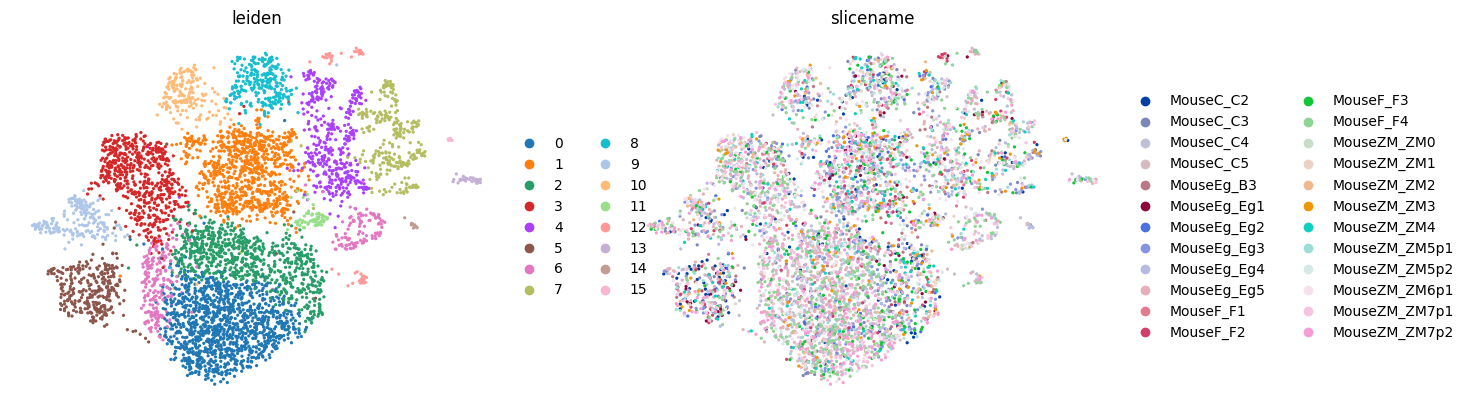

In [18]:
# Visualize UMAP with clusters
sc.pl.umap(adata, color=["leiden", "slicename"], frameon=False, legend_loc="right margin")


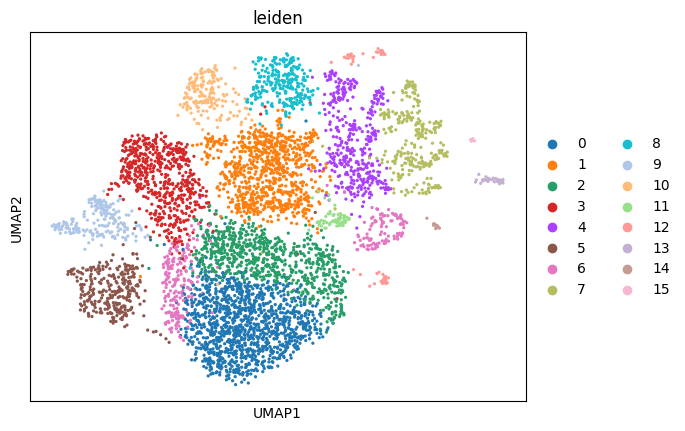

In [19]:
sc.pl.umap(
    adata,
    color=["leiden"],
    ncols=3,
)

### mouse ID and slice ID correspondence madness!

In [1]:
import glob, sys, os
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import pandas as pd
import scanpy as sc
import logging
# Setup logging
logging.basicConfig(level=logging.INFO)

sys.path.append('/home/shuonan.chen/scratch_shuonan/code/pons_merfish_pipeline/processing/func/')
from prepare_img_utils import *
from utils import get_paths
paths = get_paths()
print(paths.keys())

dict_keys(['code_root', 'data_root', 'package_root'])


In [2]:
# Define constants

globalscaling = 32
# save_destination = '/allen/aind/scratch/shuonan.chen/code/pons_merfish_pipeline/processing/'  # should be cwd
# main_dir = '/allen/aind/scratch/shuonan.chen/pons_images/'  # where raw images are 

all_tifs = (paths['data_root'] + '*/' + 'analyzed_data/*/region_*/images/*.tif')
name_of_slice_all = [[s for s in f.split('/') if "Mouse" in s][0] for f in glob.glob(all_tifs)]
name_of_slice_all = np.unique(name_of_slice_all)
invalid_slices = [name_of_slice_all[0],name_of_slice_all[15]]

In [7]:
counter=0

for name_of_slice in name_of_slice_all:
    counter+=1
    thisdircheck = (paths['data_root'] + name_of_slice + '/' + 'analyzed_data/*/region_*/')
    alltifregions = np.array([[s for s in m.split('/') if 'region' in s][0] for m in glob.glob(thisdircheck + '/images/*.tif')])
    values, counts = np.unique(alltifregions, return_counts=True)
    region_chosen = values[np.argmax(counts)]
    thisdircheck = (paths['data_root'] + name_of_slice + '/' + f'analyzed_data/*/{region_chosen}/')

    cell_loc_path = glob.glob(thisdircheck + 'cell_metadata.csv')[0]
    countmatrix_path = glob.glob(thisdircheck+'cell_by_gene.csv')[0]

    slice_id = cell_loc_path.split('/')[-3]  
    print(counter, name_of_slice, slice_id)
    

1 MouseC_C1 VS6MsBrain_C1_VS6libary_V3_LH_03-14-21
2 MouseC_C2 VS6MsBrain_C2_VS6libary_V1_LH_03-14-21
3 MouseC_C3 VS6MsBrain_C3_VS6libary_V10_LH_03-15-21
4 MouseC_C4 VS6MsBrain_C4_VS6libary_V1_LH_03-17-21
5 MouseC_C5 VS6MsBrain_C5_VS6libary_V3_LH_03-17-21
6 MouseEg_B3 VS6_MsBrain_B3_VS6library_V10_LH_02-07-21
7 MouseEg_Eg1 MsBrain_Eg1_VS6_JH_V6_05-02-2021
8 MouseEg_Eg2 MsBrain_Eg2_VS6_V11_JH_05-02-2021
9 MouseEg_Eg3 MsBrain_Eg3_VS6_JH_V6_05-01-2021
10 MouseEg_Eg4 VS6MsBrain_EG4_VS6library_V6_LH_04-14-21
11 MouseEg_Eg5 MsBrain_Eg5_VS6_JH_V6_05-16-2021
12 MouseF_F1 VS6MsBrain_F1_VS6libary_V10_LH_03-19-21
13 MouseF_F2 VS6MsBrain_F2_VS6libary_V3_LH_03-21-21
14 MouseF_F3 VS6MsBrain_F3_VS6libary_V10_LH_03-21-21
15 MouseF_F4 VS6MsBrain_F4_VS6libary_V3_LH_03-19-21
16 MouseF_F5 VS6MsBrain_F5_VS6libary_V10_LH_03-17-21
17 MouseZM_ZM0 MsBrain_ZM0_VS6_JH_V6_05-15-2021
18 MouseZM_ZM1 MsBrain_ZM1_VS6_JH_V11_05-16-2021
19 MouseZM_ZM2 MsBrain_ZM2_VS6_JH_V11_05-15-2021
20 MouseZM_ZM3 MsBrain_ZM3_VS6_JH_

# xml files 

In [3]:
import xml.etree.ElementTree as ET
save_destination = '/allen/aind/scratch/shuonan.chen/code/pons_merfish_pipeline/processing/'

In [5]:
name_of_slice = 'MouseC_C2'

In [7]:
width = 3000,
height = 122

In [8]:
tree = ET.parse(save_destination + '/image_xml/template.xml')
root = tree.getroot()
# root[0].attrib['filename'] = f'cell_img_{name_of_slice}.jpg'
# root[0].attrib['width'] = f'{int(width)}'
# root[0].attrib['height'] = f'{int(height)}'
# tree.write(save_destination + f'/foooooo.xml')

'cell_img_MouseC_C1'

In [11]:
dir(root[0])

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'attrib',
 'clear',
 'extend',
 'find',
 'findall',
 'findtext',
 'get',
 'getchildren',
 'getiterator',
 'insert',
 'items',
 'iter',
 'iterfind',
 'itertext',
 'keys',
 'makeelement',
 'remove',
 'set',
 'tag',
 'tail',
 'text']

# get all the file directories

In [2]:
import glob, sys, os
import tifffile
from pprint import pprint
import matplotlib.pyplot as plt
import skimage.transform 
import numpy as np

import tqdm
import pandas as pd
import h5py

In [25]:
main_dir = '/allen/aind/scratch/shuonan.chen/pons_images/'
all_tifs = (main_dir + '*/' + 'analyzed_data/*/region_*/images/*.tif')
name_of_slice_all = [[s for s in f.split('/') if "Mouse" in s][0] for f in glob.glob(all_tifs)]

In [26]:
for name_of_slice in name_of_slice_all:
    thisdircheck = (main_dir + name_of_slice + '/' + 'analyzed_data/*/region_*/')
    cell_loc_path = glob.glob(thisdircheck + 'cell_metadata.csv')[0]
    countmatrix_path = glob.glob(thisdircheck+'cell_by_gene.csv')[0]
    print(cell_loc_path)

/allen/aind/scratch/shuonan.chen/pons_images/MouseC_C1/analyzed_data/VS6MsBrain_C1_VS6libary_V3_LH_03-14-21/region_1/cell_metadata.csv
/allen/aind/scratch/shuonan.chen/pons_images/MouseC_C2/analyzed_data/VS6MsBrain_C2_VS6libary_V1_LH_03-14-21/region_1/cell_metadata.csv
/allen/aind/scratch/shuonan.chen/pons_images/MouseC_C3/analyzed_data/VS6MsBrain_C3_VS6libary_V10_LH_03-15-21/region_1/cell_metadata.csv
/allen/aind/scratch/shuonan.chen/pons_images/MouseC_C4/analyzed_data/VS6MsBrain_C4_VS6libary_V1_LH_03-17-21/region_1/cell_metadata.csv
/allen/aind/scratch/shuonan.chen/pons_images/MouseC_C5/analyzed_data/VS6MsBrain_C5_VS6libary_V3_LH_03-17-21/region_0/cell_metadata.csv
/allen/aind/scratch/shuonan.chen/pons_images/MouseEg_B3/analyzed_data/VS6_MsBrain_B3_VS6library_V10_LH_02-07-21/region_1/cell_metadata.csv
/allen/aind/scratch/shuonan.chen/pons_images/MouseEg_Eg1/analyzed_data/MsBrain_Eg1_VS6_JH_V6_05-02-2021/region_1/cell_metadata.csv
/allen/aind/scratch/shuonan.chen/pons_images/MouseEg_E